# Biodiversity in National Parks

## Introduction
This project will interpret data from the National Parks Service about endangered species in different parks.

**Goal**:
To perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

The project aims to answer:
- What is the distribution of conservation_status for animals?
- Which species were spotted the most at each park?
- What park has the most endangered species?
- What category/type of species is the most endangered?
- Are the differences between species and their conservation status significant?

**Data source**:Both Observations.csv and Species_info.csv was provided by Codecademy.com.


**Analysis**: Exploratory and Inferential Analysis used

### Import Modules

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


### Load Data

The Observations.csv contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- scientific_name - The scientific name of each species
- park_name - The name of the national park
- observations - The number of observations in the past 7 days

In [7]:
observation = pd.read_csv('observations.csv')
print(observation.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


The species_info.csv contains information on the different species in the National Parks. The columns in the data set include:

- category - The category of taxonomy for each species
- scientific_name - The scientific name of each species
- common_names - The common names of each species
- conservation_status - The species conservation status

In [9]:
species_info = pd.read_csv('species_info.csv')
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


### Explore the Data

In [11]:
observation.shape #(rows, columns)


(23296, 3)

In [12]:
species_info.shape

(5824, 4)

In [13]:
#datatypes
observation.dtypes


scientific_name    object
park_name          object
observations        int64
dtype: object

In [14]:
species_info.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [16]:
observation.nunique()


scientific_name    5541
park_name             4
observations        304
dtype: int64

In [20]:
species_info.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [26]:
print(species_info.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [28]:
#count of category in the data
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [30]:
print(species_info.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [32]:
#How many species are in each category
print(species_info.conservation_status.isna().sum()) #no of nan values 

print(species_info.groupby("conservation_status").size())

5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


There are 5633 nan values in the conservation_status column and based on the categories of the column wecan conlude that the rows with nan values are species that are not under any conservation status.

In [35]:
print(observation.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [37]:
#no of species entries by park
observation.groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

In [39]:
#total no of observations in each park

# Group by park and sum observations
park_observations = observation.groupby('park_name')['observations'].sum().reset_index()

# Display the result
print(park_observations)


                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332


In [41]:
observation.observations.sum() #The total number of observations made in the dataset

3314739

## Analysing the Data

1. Firstly converting the nan values to None- meaning no conservation status

In [45]:
species_info['conservation_status'] = species_info['conservation_status'].fillna("None")
print(species_info.head(20))


   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
5    Mammal         Odocoileus virginianus   
6    Mammal                     Sus scrofa   
7    Mammal                  Canis latrans   
8    Mammal                    Canis lupus   
9    Mammal                    Canis rufus   
10   Mammal       Urocyon cinereoargenteus   
11   Mammal                   Vulpes fulva   
12   Mammal                  Vulpes vulpes   
13   Mammal                 Felis concolor   
14   Mammal               Felis silvestris   
15   Mammal                     Lynx rufus   
16   Mammal                  Puma concolor   
17   Mammal              Mephitis mephitis   
18   Mammal             Spilogale putorius   
19   Mammal              Lontra canadensis   

                                 

2. What is the distribution of conservation_status for animals?

In [48]:
filtered_species_info = species_info[species_info['conservation_status'] != 'None'] #filtering out the None category
sc_crosstab = pd.crosstab(filtered_species_info['conservation_status'], species_info['category'])
sc_crosstab

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


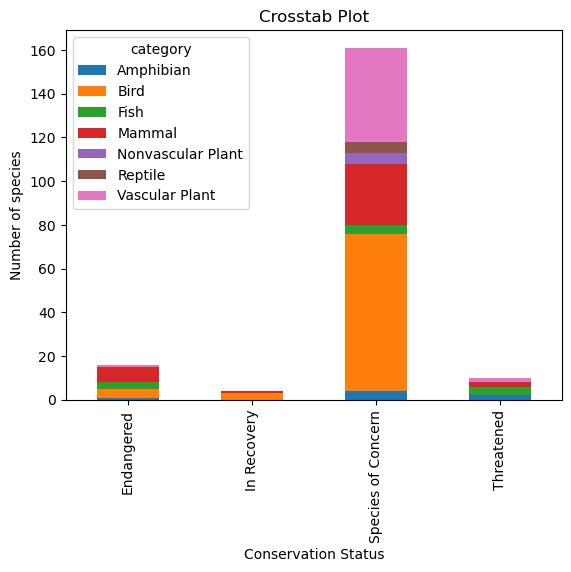

In [50]:
#plotting the crosstab
sc_crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Conservation Status')
plt.ylabel('Number of species')
plt.title('Crosstab Plot')
plt.show()

Insight: This shows that most species with a conservation staus other than none are Species of Concern. It also shows birds with the most species in 'species of conern' but also the most 'in recovery'. From this distribution we may also conlude that out of all the conservation satuses there are very few species in recovery.

2. Which species were spotted the most at each park? 


In [54]:
#park name, scientific name, observation, observation csv
#iterate though the dataset, for each park give me the max observation and the scientinf name of it 
grouped_data = observation.groupby('park_name')
for park_name, group in grouped_data:
    max_observations = group.loc[group['observations'].idxmax()] 
    # .idxmax returns the index of the first occurrence of the maximum value in the ‘observations’ column.
    #group.loc retrieves the row corresponding to the index returned by idxmax(), which is the row with the maximum observations.
    print(f"Park: {park_name}, Species: {max_observations['scientific_name']}, Observations: {max_observations['observations']}")
    

Park: Bryce National Park, Species: Valerianella radiata, Observations: 176
Park: Great Smoky Mountains National Park, Species: Sonchus asper ssp. asper, Observations: 147
Park: Yellowstone National Park, Species: Lycopodium tristachyum, Observations: 321
Park: Yosemite National Park, Species: Ivesia shockleyi var. shockleyi, Observations: 223


From this we can see the most observed specie in each park. Upon checking the species_info dataset they all appear to be Vascular plants.
Went further by looking at the distribution of the specie categories across parks.

First I'll merge the dataset to aid the analysis

In [58]:
merged_df = pd.merge(observation, species_info, on='scientific_name', how='outer')
print(merged_df.head())
print(len(merged_df))
merged_df.isna().sum()

  scientific_name                            park_name  observations  \
0   Abies bifolia                  Bryce National Park           109   
1   Abies bifolia            Yellowstone National Park           215   
2   Abies bifolia  Great Smoky Mountains National Park            72   
3   Abies bifolia               Yosemite National Park           136   
4  Abies concolor  Great Smoky Mountains National Park           101   

         category                                       common_names  \
0  Vascular Plant                          Rocky Mountain Alpine Fir   
1  Vascular Plant                          Rocky Mountain Alpine Fir   
2  Vascular Plant                          Rocky Mountain Alpine Fir   
3  Vascular Plant                          Rocky Mountain Alpine Fir   
4  Vascular Plant  Balsam Fir, Colorado Fir, Concolor Fir, Silver...   

  conservation_status  
0                None  
1                None  
2                None  
3                None  
4             

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

In [59]:
#What is the distribution of each species category across parks?
parkwise_distribution = merged_df.groupby(['park_name', 'category'])['scientific_name'].nunique().reset_index()
print(parkwise_distribution)


                              park_name           category  scientific_name
0                   Bryce National Park          Amphibian               79
1                   Bryce National Park               Bird              488
2                   Bryce National Park               Fish              125
3                   Bryce National Park             Mammal              176
4                   Bryce National Park  Nonvascular Plant              333
5                   Bryce National Park            Reptile               78
6                   Bryce National Park     Vascular Plant             4262
7   Great Smoky Mountains National Park          Amphibian               79
8   Great Smoky Mountains National Park               Bird              488
9   Great Smoky Mountains National Park               Fish              125
10  Great Smoky Mountains National Park             Mammal              176
11  Great Smoky Mountains National Park  Nonvascular Plant              333
12  Great Sm

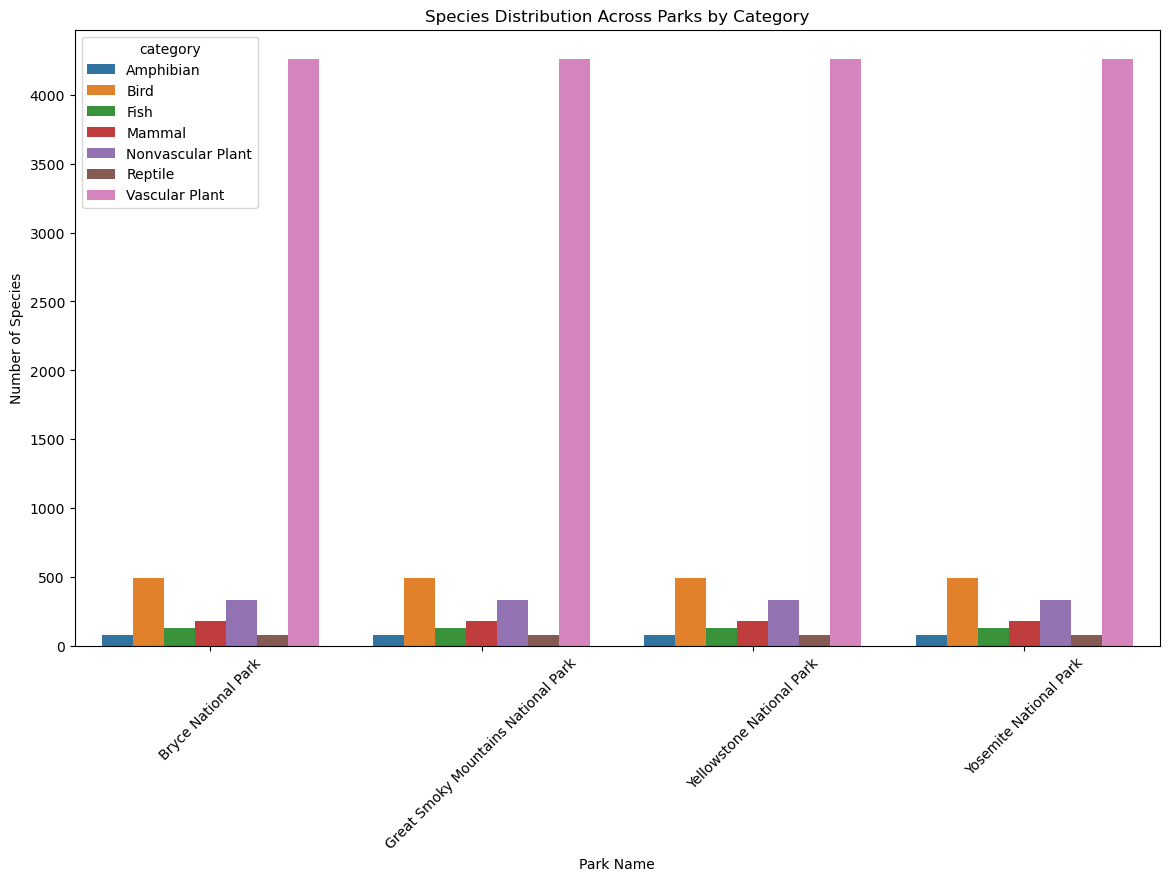

In [62]:
plt.figure(figsize=(14, 8))
sns.barplot(data=parkwise_distribution, x='park_name', y='scientific_name', hue='category')
plt.title('Species Distribution Across Parks by Category')
plt.ylabel('Number of Species')
plt.xlabel('Park Name')
plt.xticks(rotation=45)
plt.show()


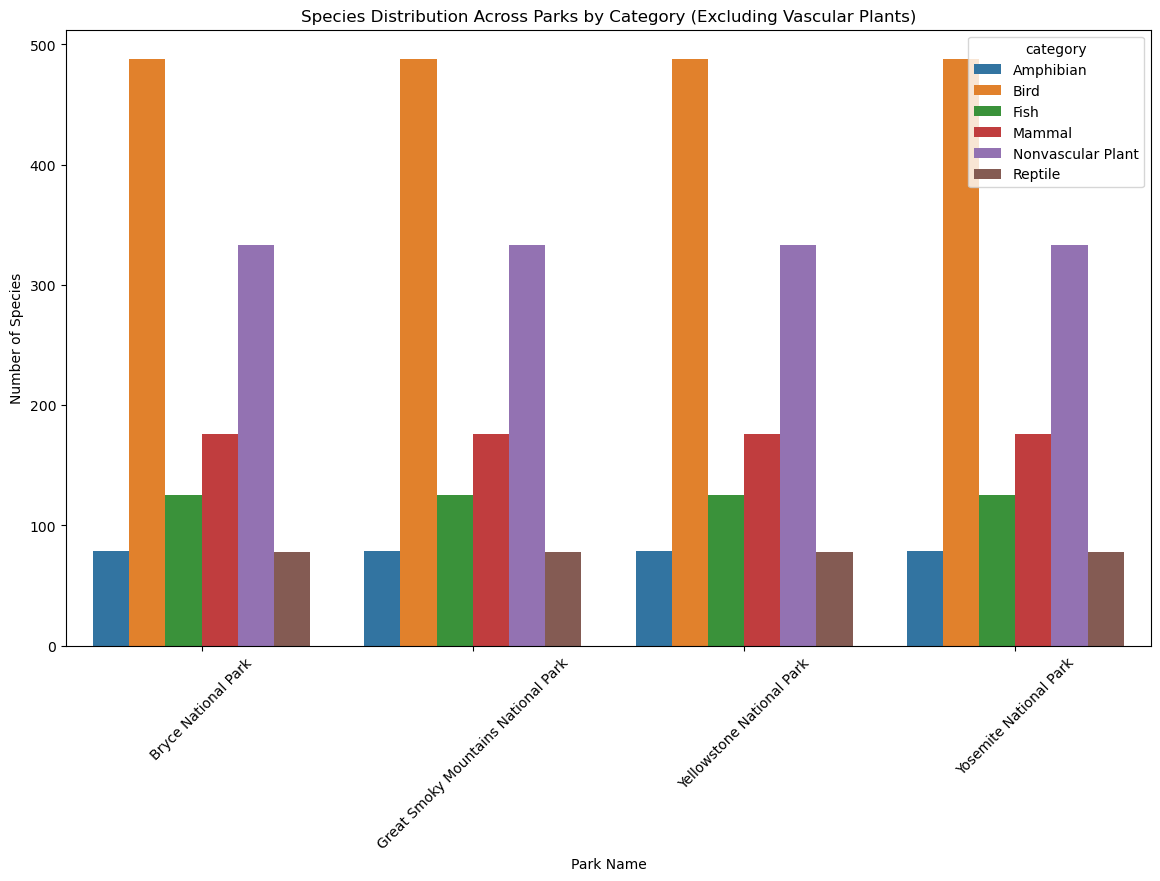

In [63]:
#creating a second chart without vascular plants to focus on distribution of less prevalent categories
# Filter out vascular plants
non_vascular_data = parkwise_distribution[parkwise_distribution['category'] != 'Vascular Plant']

# Plot 
plt.figure(figsize=(14, 8))
sns.barplot(data=non_vascular_data, x='park_name', y='scientific_name', hue='category')
plt.title('Species Distribution Across Parks by Category (Excluding Vascular Plants)')
plt.ylabel('Number of Species')
plt.xlabel('Park Name')
plt.xticks(rotation=45)
plt.show()


It looks like the specie categories are venly distributed among each park. This may mean consistent species diversity or dataset limitations.


3.  What park has the most endangered species?

In [67]:
#park_name, conservation status, specie
#Filter data to include only rows with the status 'Endangered'
endangered_data = merged_df[merged_df['conservation_status'] == 'Endangered']
grouped_data = endangered_data.groupby('park_name')

max_species_count = 0
park_with_most_endagered = None
for park_name, group in grouped_data:
    species_count = group['scientific_name'].nunique()
    if species_count > max_species_count:
        max_species_count = species_count
        park_with_most_endangered = park_name
print(f"Park with the most endangered species: {park_with_most_endangered}, Number of species: {max_species_count}")



Park with the most endangered species: Bryce National Park, Number of species: 15


4.  What category/type of specie is the most endangered/most likely to be endangered?

In [71]:
#most likely to be endangered means it is one of the statuses that is not none
#so first create a column of the no of species whose status isn't none then group the column by category

species_info['likely_endangered'] = species_info.conservation_status != 'None'

count = species_info.groupby(['category','likely_endangered']).scientific_name.nunique().reset_index().pivot(columns='likely_endangered',index='category',values='scientific_name').reset_index()
#count = species_info.groupby(['category','likely_endangered']).scientific_name.nunique().reset_index()
count.columns = ['category', 'not_likely(false)', 'likely(true)']
count


,category,not_likely(false),likely(true)
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Insight: This shows  Birds, Mammals and Vascular plants with the highest no of species that are most likely to be endagered

In [74]:
#Calculating the percentage based on the total population of species by category to get proper insight
#true/true+false times 100
xx = count['likely(true)']
xy = count['not_likely(false)']
count['percent_protected'] = xx /  (xx + xy) * 100
count

,category,not_likely(false),likely(true),percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


This shows that Birds have a 15% and Mammals have a 17% of their species are most likely to be endangered.

5. Are the differences between species and their conservation status significant?
 

Basically are certain species  more likely to have a specific conservation status (like endangered, threatened, etc.) compared to others.

Chi-square is a common method for testing for independence between two categorical variables, such as species and conservation status.
It checks whether the distribution of conservation statuses is independent of species.


In [80]:
#Using the categories Bird and Mammal as they fit the chi square assumptions
from scipy.stats import chi2_contingency
contingency2 = [
    [413, 75], #Bird
    [146, 30], #Mammal
]
chi2, pval, dof, expected = chi2_contingency(contingency2)
print((chi2,pval))


(0.16170148316545574, 0.6875948096661336)


This suggests that there is no significant association between the category and conservation status based on the categories used. The p-value is also greater than 0.05 which supports the chi-square value obtained.


# Conclusions

**Conclusions drawn from questions and analysis performed:**

There is no pattern when it comes to the type of species that becomes endangered as there is no significant association between the category of species and their conservation status. However, based on the data Mammals and Birds have the most species that are likely to be endangered( meaning falling under one of the following categories: 'In Recovery', 'Threatened', 'Endangered', 'Species of Concern'). In addition, Vascular plas dominate in numbers but are less likely to be endangered.

The park-wise observations do not show additional patterns relevant to the conservation goals.

**In the future I hope to:**
- Compare data across different geographic regions to uncover larger biodiversity patterns.
- Investigating changes in conservation statuses over time (if temporal data becomes available).


